**Basic EDA**
* Logistic Regression
* GridsearchCV,RandomizedsearchCV
* GaussianNB
* Support Vector Machine

**Performance measurements**
* Classification report,Confusion Matrix, precision, recall, F1 score, roc_auc_score, accuracy_score

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings('ignore')

['mushrooms.csv']


Import some common libraries used down the line

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

loading the dataset into pandas dataframe

In [3]:
data = pd.read_csv("../input/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

There are many features with non-numeric or categorical data. ML can be applied only on numeric values. so we have to convert it to numerical values for which you can use label encoder.

In [5]:
#Let's check for missing null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
#let's see how many categories are available for predictions
data['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
#converting categorical data (including Class column) into numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lablencoder = LabelEncoder()

for col in data.columns:
    data[col] = lablencoder.fit_transform(data[col])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [8]:
#we already saw how many types of classes we need to predict. Just 'p','e' in this case.
#let's see how many observations are related to each class
print(data['class'].value_counts())

0    4208
1    3916
Name: class, dtype: int64


Pretty Good!! we have balanced set of observations for each class

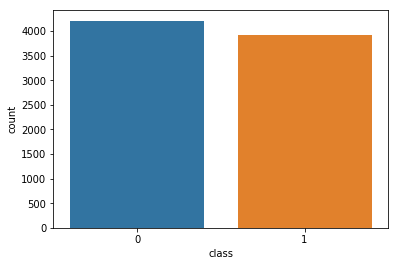

In [9]:
#visualizing the same using seaborn
sns.countplot(data['class'])

In [10]:
#seperate the features & response to feed to algorithms
X = data.iloc[:,1:23]
y = data.iloc[:,0]

In [11]:
#check the correlation of the data
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Many algorithms are sensitive to the scale of Features. It's better to standardize the data before we feed it to algos.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

split the data into training & test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

![](http://)**1. Training Default Logistic Regression Model**

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9513846153846154


we got 95% accuracy with default Logistic Regression Model. Let's perform PCA on the data & see if that improves the accuracy score

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [17]:
#split the data into training & test set based on PCA data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
logreg1 = LogisticRegression()
logreg1.fit(X_train,y_train)
y_pred1 = logreg1.predict(X_test)

print(accuracy_score(y_test,y_pred1))

0.9513846153846154


so PCA does not have any effect on Logistict Regression model.
**Let's fine tune the Model by changing its hyperparameters**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR_model = LogisticRegression()

tuned_parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1','l2']}

In [20]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LR_model,tuned_parameters, cv=10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print(grid_search.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [22]:
LR_model = LogisticRegression(C=1000, penalty='l1')
LR_model.fit(X_train,y_train)

y_train_pred = LR_model.predict(X_train)
print('accuracy on Train data',accuracy_score(y_train,y_train_pred))

y_pred = LR_model.predict(X_test)
print('accuracy on Test data',accuracy_score(y_test,y_pred))

accuracy on Train data 0.9679950761655639
accuracy on Test data 0.9661538461538461


**so we have got an accuracy of 96% with Fine Tuned Logistic Regression**

Let's see some other models now

**Gaussian Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()

GNB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_pred = GNB_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
GNB_model.score(X_test,y_pred)

0.9218461538461539


1.0

Gaussian Naive Bayes model has 92% accuracy which is less than Logistic Regression Model

In [25]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 1625 points : 127


**Support Vector Machines**

In [26]:
from sklearn.svm import SVC
svc_model = SVC()

params = {
    'C':[1, 10, 100,500, 1000], 'kernel':['linear','rbf'],
    'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rnd_search = RandomizedSearchCV(svc_model,params,cv=10,scoring='accuracy',n_iter=20)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'C': [1, 10, 100, 500, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [28]:
print(rnd_search.best_score_)

1.0


In [29]:
y_train_pred = rnd_search.predict(X_train)
print('accuracy on Train data',accuracy_score(y_train,y_train_pred))
y_pred = rnd_search.predict(X_test)
print('accuracy on Test data',accuracy_score(y_test,y_pred))

accuracy on Train data 1.0
accuracy on Test data 1.0


**We have got 100% accuracy using this SVM model**

Let's see its precision, recall,f1score,roc_auc_scores to confirm it classifies perfectly

In [30]:
from sklearn import metrics

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[843,   0],
       [  0, 782]])

False Positive Rate, False Negative Rate are 0 which means it predicts/classified perfectly.

True Positive rate = 843 (which means there are 843 observations with Class = 0, posionous)
True Negative rate = 782 (which means there are 782 observations with Class = 1, edible)

check the same below

In [32]:
y_test.value_counts()

0    843
1    782
Name: class, dtype: int64

In [33]:
auc_roc = metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       843\n           1       1.00      1.00      1.00       782\n\n   micro avg       1.00      1.00      1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [34]:
metrics.roc_auc_score(y_test,y_pred)

1.0